In [2]:
from loguru import logger
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
)
from tensorflow.data import AUTOTUNE
from typing import List

from src import (
    Dataset as WSI_Dataset,
    ModelContext,
    ModelFactory,
)

import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"


In [3]:
VALIDATION_SPLIT = 0.2


In [4]:
contexts: List[ModelContext] = ModelFactory.models()
logger.info("Available models\n" + "\n".join([c.filename for c in contexts]))


2024-04-09 17:07:10.048263: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-09 17:07:10.049387: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-09 17:07:10.050140: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-09 17:07:10.315773: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-09 17:07:10.316953: I external/local_xla/xla/stream_executor

In [5]:
def make_prediction(model, ds):
    predictions = model.predict(
        ds,
        verbose=1,
    )

    actual = np.array([l.numpy() for _, l in ds])
    predicted = np.argmax(predictions, axis=-1)

    logger.info(f"Accuracy: {accuracy_score(actual, predicted)}")
    logger.info(f"Precision: {precision_score(actual, predicted, average='micro')}")
    logger.info(f"Sensitivity recall: {recall_score(actual, predicted, average='micro')}")
    logger.info(f"Specificity: {recall_score(actual, predicted, pos_label=0, average='micro')}")
    logger.info(f"F1 score: {f1_score(actual, predicted, average='micro')}")

    cm = confusion_matrix(actual, predicted)

    cm_display = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=class_names,
    )

    cm_display.plot(
        cmap="Blues",
        ax=plt.subplots(figsize=(9, 9))[1]
    )

    plt.show()


In [6]:
_, _, _raw_test_ds = WSI_Dataset.get(validation_split=VALIDATION_SPLIT)

class_names = _raw_test_ds.class_names

logger.info(f"Raw test set with {len(_raw_test_ds)} samples and {len(_raw_test_ds.class_names)} of classes, which are {', '.join(_raw_test_ds.class_names)}")

test_ds = _raw_test_ds \
    .batch(1) \
    .cache() \
    .prefetch(buffer_size=AUTOTUNE)

logger.info(f"Test set with {len(test_ds)} samples")


Resolving data files:   0%|          | 0/1200 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1196 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/20 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/20 [00:00<?, ?it/s]

2024-04-09 17:07:38.811 | INFO     | __main__:<module>:5 - Raw test set with 1196 samples and 12 of classes, which are 1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9
2024-04-09 17:07:38.847 | INFO     | __main__:<module>:12 - Test set with 1196 samples


2024-04-09 17:07:38.963 | INFO     | __main__:<module>:2 - Model: sequential-4883f1.keras


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,325,030 (39.39 MB)

 Trainable params: 3,441,676 (13.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,883,354 (26.26 MB)

I0000 00:00:1712653659.396876   55973 service.cc:145] XLA service 0x7f86580076f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712653659.397009   55973 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-04-09 17:07:39.500492: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-09 17:07:39.702564: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  34/1196 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step

I0000 00:00:1712653661.217535   55973 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1196/1196 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


2024-04-09 17:07:47.067209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-09 17:07:47.071 | INFO     | __main__:make_prediction:10 - Accuracy: 0.19732441471571907
2024-04-09 17:07:47.076 | INFO     | __main__:make_prediction:11 - Precision: 0.19732441471571907
2024-04-09 17:07:47.082 | INFO     | __main__:make_prediction:12 - Sensitivity recall: 0.19732441471571907
/home/kim/.cache/pypoetry/virtualenvs/wood-species-identification-hpklw3A5-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1561: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
2024-04-09 17:07:47.088 | INFO     | __main__:make_prediction:13 - Specificity: 0.19732441471571907
2024-04-09 17:07:47.093 | INFO     | __main__:make_prediction:14 - F1 score: 0.19732441471571907


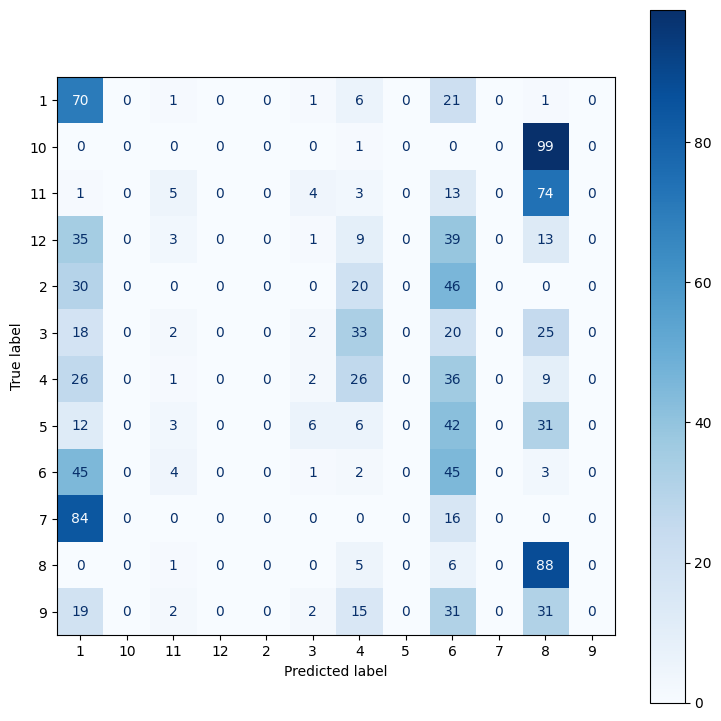

In [7]:
for c in contexts:
    logger.info(f"Model: {c.filename}")
    c.model.summary()

    make_prediction(c.model, test_ds)
